In [1]:
import json

# Load your enriched dataset
with open("dunya_output_file_ALL.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Filter and measure article_body lengths (in words)
lengths = [
    len(entry["content"].split())
    for entry in data
    if entry.get("content") and entry["content"].strip()
]

print(f"✅ Total articles with non-empty article_body: {len(lengths)}")
print(f"🔢 Min length: {min(lengths)} words")
print(f"🔢 Max length: {max(lengths)} words")
print(f"📊 Average length: {sum(lengths) / len(lengths):.2f} words")


✅ Total articles with non-empty article_body: 278992
🔢 Min length: 1 words
🔢 Max length: 11547 words
📊 Average length: 271.17 words


In [2]:
import pandas as pd

data = pd.DataFrame(data)

In [3]:
print(data.head())

print(len(data))

              published_date                     update         category  \
0  2020-08-12T12:25:00+03:00  2020-08-12T12:25:00+03:00  sektorler_emlak   
1  2015-07-23T13:51:37+03:00  2015-07-23T13:51:37+03:00  finans_haberler   
2  2015-03-31T08:58:48+03:00  2015-03-31T08:58:48+03:00            dunya   
3  2018-10-21T14:32:00+03:00  2018-10-21T14:32:00+03:00          ekonomi   
4  2009-05-08T15:13:09+03:00  2009-05-08T15:13:09+03:00            dunya   

                                                 url  \
0  https://www.dunya.com/sektorler/emlak/menkulle...   
1  https://www.dunya.com/finans/haberler/merkez-b...   
2  https://www.dunya.com/dunya/arap-ucaklari-bask...   
3  https://www.dunya.com/ekonomi/sonbaharda-bir-n...   
4  https://www.dunya.com/dunya/turkiyeli-ab-buyuk...   

                                               title  \
0    'Menkulleşmeyle, milli gelir 25 bin $ olabilir'   
1        Merkez Bankası faiz oranlarını değiştirmedi   
2        Arap uçakları başkenti vurdu:

In [4]:
# Force parsing to datetime, assuming UTC for consistency
data['published_date'] = pd.to_datetime(data['published_date'], utc=True)

# Now extract the year safely
data['year'] = data['published_date'].dt.year

# Preview the result
print(data[['published_date', 'year']].head())


             published_date  year
0 2020-08-12 09:25:00+00:00  2020
1 2015-07-23 10:51:37+00:00  2015
2 2015-03-31 05:58:48+00:00  2015
3 2018-10-21 11:32:00+00:00  2018
4 2009-05-08 12:13:09+00:00  2009


In [5]:
data.tail()

,published_date,update,category,url,title,abstract,content,language,docname,yatırım,predicted_label1,year
278987,2015-01-05 09:11:37+00:00,2015-01-05T11:11:37+02:00,gundem,https://www.dunya.com/gundem/kabine-ataturk-or...,"Kabine, Atatürk Orman Çiftliği'nde!","Başbakan Ahmet Davutoğlu, Bakanlar Kurulu üyel...","\nBaşbakan Ahmet Davutoğlu, 2015 yılının ilk B...",turkish,text165988,-0.7873,1,2015
278988,2016-11-25 07:45:00+00:00,2016-11-25T10:45:00+03:00,sektorler_enerji,https://www.dunya.com/sektorler/enerji/brent-p...,Brent petrol 48 dolar seviyelerine geriledi,"Brent petrolün varil fiyatı, uluslararası piya...",\nHafta başından bu yana Petrol İhraç Eden Ülk...,turkish,text165989,-0.4462,1,2016
278989,2016-12-30 14:36:00+00:00,2016-12-30T17:36:00+03:00,sektorler_enerji,https://www.dunya.com/sektorler/enerji/bakanli...,Bakanlık'tan elektrik kesintisi açıklaması,Enerji ve Tabii Kaynaklar Bakanlığı tarafından...,\nİstanbul Avrupa Yakası’nın elektrik dağıtımı...,turkish,text165990,-2.0414,0,2016
278990,2016-04-11 08:02:30+00:00,2016-04-11T11:02:30+03:00,is-dunyasi,https://www.dunya.com/is-dunyasi/039risklere-d...,"'Risklere değil, fırsatlara odaklanalım'","TOBB Başkanı Hisarcıklıoğlu, ""Odaklanmamız ger...",\nTürkiye Odalar ve Borsalar Birliği (TOBB) Ba...,turkish,text165991,0.3966,1,2016
278991,2022-03-09 17:54:00+00:00,2022-03-09T20:54:00+03:00,ekonomi,https://www.dunya.com/ekonomi/benzin-ve-motori...,Benzin ve motorine yapılan son zam iptal edildi,Enerji Petrol Gaz İkmal İstasyonları İşveren S...,\nBenzin ve motorine yapılan ve 10 Mart 2022'd...,turkish,text165992,0.0883,1,2022


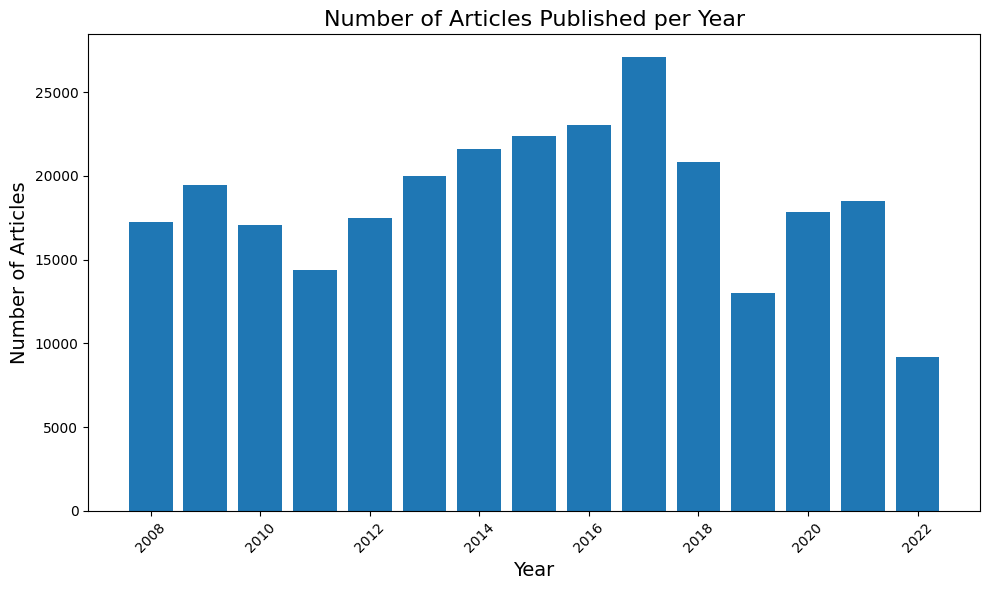

In [6]:
import matplotlib.pyplot as plt

# Group and count by year
year_counts = data['year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.title('Number of Articles Published per Year', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Filtering the Articles

In [7]:
import json
import re

OUTPUT_FILE = "dunya_china_framed_articles_with_all_texts.json"

# Define your keyword pattern
keyword_patterns = [
    r"(?<!\w)Çin(?:['’]?[a-zA-ZçğıöşüÇĞİÖŞÜ]*)?(?!\w)",
    r"(?<!\w)Pekin(?:['’]?[a-zA-ZçğıöşüÇĞİÖŞÜ]*)?(?!\w)",
    r"(?<!\w)Huawei(?!\w)",
    r"Kuşak ve Yol",
    r"İpek Yolu",
    r"(?<!\w)Taiwan(?!\w)",
    r"(?<!\w)Tayvan(?!\w)",
    r"(?<!\w)China(?!\w)",
    r"(?<!\w)Beijing(?!\w)",
    r"Belt and Road"
]
pattern = re.compile("|".join(keyword_patterns), re.IGNORECASE)

# Filter and collect rows
filtered = []

for _, row in data.iterrows():
    title = str(row.get("title", ""))
    abstract = str(row.get("abstract", ""))
    content = str(row.get("content", ""))

    all_texts = f"{title}\n{abstract}\n{content}".strip()

    if pattern.search(all_texts):
        row_dict = row.astype(str).to_dict()  # convert every value to string
        row_dict["all_texts"] = all_texts
        filtered.append(row_dict)

# Now save to JSON safely
with open(OUTPUT_FILE, "w", encoding="utf-8") as f:
    json.dump(filtered, f, ensure_ascii=False, indent=2)

# Show result summary
print(f"✅ Found {len(filtered)} China-related articles")
for article in filtered[:5]:
    print("-", article["title"])


✅ Found 22277 China-related articles
- New York borsası sert düşüşle açıldı
- Dış borsalarda Noel rehaveti
- ABD'de endeksler düşüşle açıldı
- Çin'de lüks tüketiminin artması, Türk hazır giyimine yaradı
- Nepal’de Türk işadamları için 7 yatırım fırsatı


## Removing duplicates with respect to url

In [8]:
import json

INPUT_FILE = "dunya_china_framed_articles_with_all_texts.json"
OUTPUT_FILE = "dunya_china_framed_articles_final.json"

# Load data
with open(INPUT_FILE, "r", encoding="utf-8") as f:
    data = json.load(f)

# Remove duplicates by url
unique_articles = {}
for article in data:
    url = article.get("url")
    if url and url not in unique_articles:
        unique_articles[url] = article

# Convert back to list
deduplicated = list(unique_articles.values())

# Save final JSON
with open(OUTPUT_FILE, "w", encoding="utf-8") as f:
    json.dump(deduplicated, f, ensure_ascii=False, indent=2)

print(f"✅ Final deduplicated dataset saved as '{OUTPUT_FILE}'")
print(f"📦 Total unique articles: {len(deduplicated)}")


✅ Final deduplicated dataset saved as 'dunya_china_framed_articles_final.json'
📦 Total unique articles: 22277


## Removing duplicates with respect to docname

In [9]:
import json

INPUT_FILE = "dunya_china_framed_articles_with_all_texts.json"
OUTPUT_FILE = "dunya_china_framed_articles_final.json"

# Load data
with open(INPUT_FILE, "r", encoding="utf-8") as f:
    data = json.load(f)

# Remove duplicates by docname
unique_articles = {}
for article in data:
    url = article.get("docname")
    if url and url not in unique_articles:
        unique_articles[url] = article

# Convert back to list
deduplicated = list(unique_articles.values())

# Save final JSON
with open(OUTPUT_FILE, "w", encoding="utf-8") as f:
    json.dump(deduplicated, f, ensure_ascii=False, indent=2)

print(f"✅ Final deduplicated dataset saved as '{OUTPUT_FILE}'")
print(f"📦 Total unique articles: {len(deduplicated)}")


✅ Final deduplicated dataset saved as 'dunya_china_framed_articles_final.json'
📦 Total unique articles: 22277


## Visualising by year

<ipython-input-10-91b4486cb3a1>:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


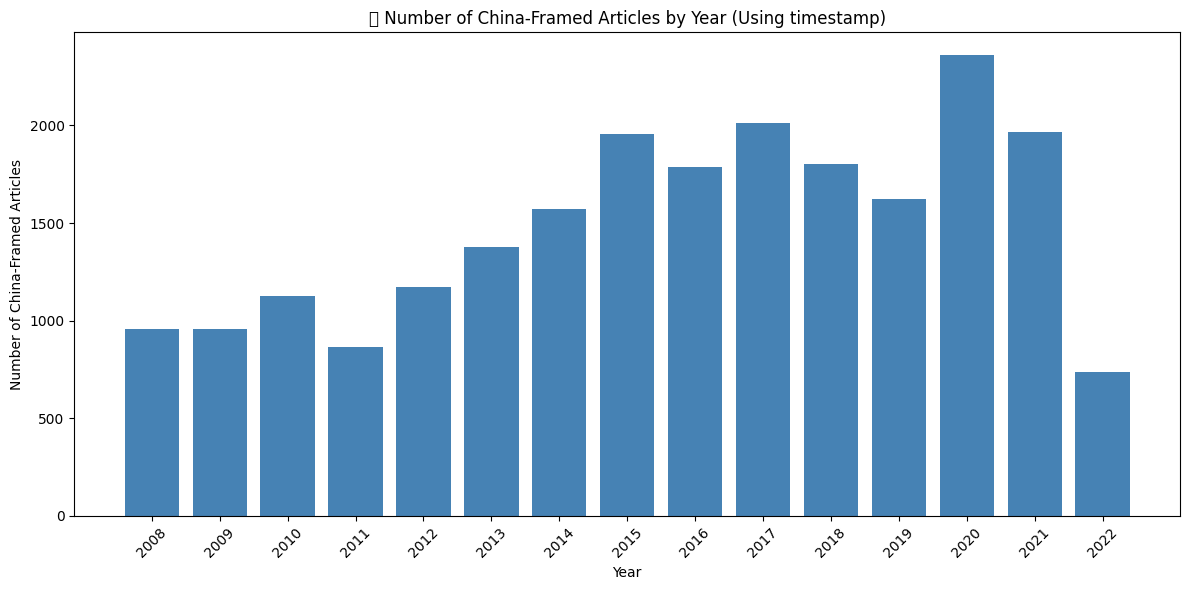

In [10]:
import json
from collections import Counter
import matplotlib.pyplot as plt

INPUT_FILE = "dunya_china_framed_articles_final.json"

# Load deduplicated dataset
with open(INPUT_FILE, "r", encoding="utf-8") as f:
    data = json.load(f)

# Count articles per year
year_counts = Counter(article["year"] for article in data if "year" in article)

sorted_years = sorted(year_counts.items())

# Plotting
labels, values = zip(*sorted_years)
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color="steelblue")
plt.xlabel("Year")
plt.ylabel("Number of China-Framed Articles")
plt.title("📊 Number of China-Framed Articles by Year (Using timestamp)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
